<font size="5">Import Library and Dataset</font>

In [37]:
#Import Library
import pandas as pd #Provides functions to merge multiple CSV files in quick time.
import numpy as np
import os #Provides functions like copy, delete, read, write files, and directories.
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


%matplotlib inline

In [38]:
train_raw=pd.read_csv('train.csv')
test_raw=pd.read_csv('test.csv')
features_raw=pd.read_csv('features.csv')
stores_raw= pd.read_csv('stores.csv')

Train.csv

In [39]:
train_raw.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [40]:
train_raw.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [41]:
print(train_raw.shape)

(421570, 5)


Features.csv

In [42]:
features_raw.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [43]:
features_raw.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [44]:
print(features_raw.shape)

(8190, 12)


Stores.csv

In [45]:
stores_raw.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [46]:
stores_raw.dtypes

Store     int64
Type     object
Size      int64
dtype: object

In [47]:
print(stores_raw.shape)

(45, 3)


<font size="5">Merging the CSVs</font>

In [48]:
train_merged = train_raw.merge(stores_raw, on=['Store'], how='inner').merge(features_raw, on=['Store','Date','IsHoliday'], how='inner')
print(train_merged.shape)


(421570, 16)


In [49]:
train_merged.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [50]:
round(train_merged.describe(),2)

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,150681.00,111248.00,137091.00,134967.00,151432.00,421570.00,421570.00
mean,22.20,44.26,15981.26,136727.92,60.09,3.36,7246.42,3334.63,1439.42,3383.17,4628.98,171.20,7.96
std,12.79,30.49,22711.18,60980.58,18.45,0.46,8291.22,9475.36,9623.08,6292.38,5962.89,39.16,1.86
min,1.00,1.00,-4988.94,34875.00,-2.06,2.47,0.27,-265.76,-29.10,0.22,135.16,126.06,3.88
25%,11.00,18.00,2079.65,93638.00,46.68,2.93,2240.27,41.60,5.08,504.22,1878.44,132.02,6.89
50%,22.00,37.00,7612.03,140167.00,62.09,3.45,5347.45,192.00,24.60,1481.31,3359.45,182.32,7.87
75%,33.00,74.00,20205.85,202505.00,74.28,3.74,9210.90,1926.94,103.99,3595.04,5563.80,212.42,8.57
max,45.00,99.00,693099.36,219622.00,100.14,4.47,88646.76,104519.54,141630.61,67474.85,108519.28,227.23,14.31


In [51]:
train_merged.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

Graph

In [52]:
count_A=stores_raw.set_index(["Type","Size"]).count(level="Type")
print(count_A)

      Store
Type       
A        22
B        17
C         6


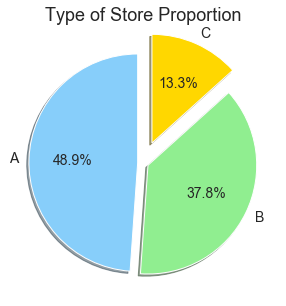

In [53]:
labels=count_A.index
colors=['lightskyblue','lightgreen','gold']
explode=[0.05,0.05,0.2]
fig,ax1=plt.subplots(figsize=(5,5))
ax1.pie(count_A['Store'],labels=labels,colors=colors,explode=explode,startangle=90,autopct='%.1f%%',textprops={'fontsize': 14},shadow=True)
plt.title("Type of Store Proportion", fontsize=18)
plt.show()

Holiday Vs Weekly_Sales

Text(0.5, 1.0, 'Weekly Sales Comparison for Holiday or Not')

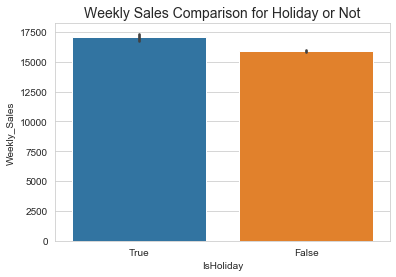

In [54]:
sns.set_style("whitegrid")
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=train_merged, order=[True,False]).set_title("Weekly Sales Comparison for Holiday or Not",fontsize=14)

Top Sales Store

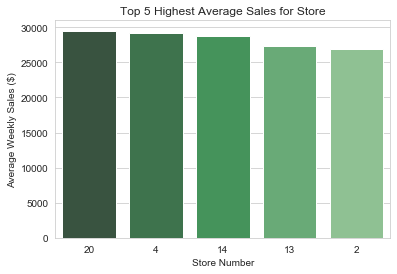

In [55]:
weekly_sales_stores = train_merged['Weekly_Sales'].groupby(train_merged['Store']).mean()
largest_5_Store=weekly_sales_stores.nlargest(5,)
sns.barplot(largest_5_Store.index,largest_5_Store.values,order=largest_5_Store.sort_values(ascending=False).index,palette="Greens_d").set_title("Top 5 Highest Average Sales for Store")
plt.xlabel('Store Number')
plt.ylabel('Average Weekly Sales ($)')
plt.show()

Lowest Sales Store

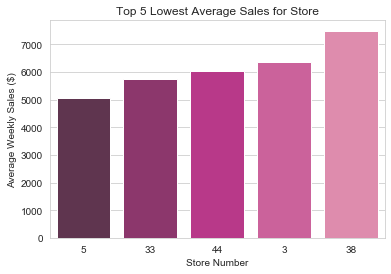

In [56]:
weekly_sales_stores = train_merged['Weekly_Sales'].groupby(train_merged['Store']).mean()
smallest_5_Store=weekly_sales_stores.nsmallest(5,)
sns.barplot(smallest_5_Store.index,smallest_5_Store.values,order=smallest_5_Store.sort_values().index,palette="RdPu_d").set_title("Top 5 Lowest Average Sales for Store")
plt.xlabel('Store Number')
plt.ylabel('Average Weekly Sales ($)')
plt.show()

Top Sales Dept

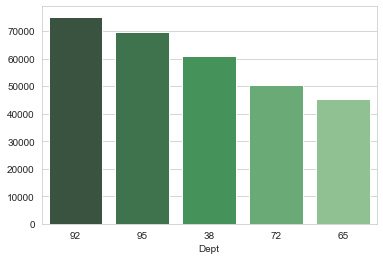

In [57]:
weekly_sales_dept = train_merged['Weekly_Sales'].groupby(train_merged['Dept']).mean()
largest_5_Dept=weekly_sales_dept.nlargest(5,)
sns.barplot(largest_5_Dept.index,largest_5_Dept.values,order=largest_5_Dept.sort_values(ascending=False).index,palette="Greens_d")
plt.show()

Lowest Sales Dept

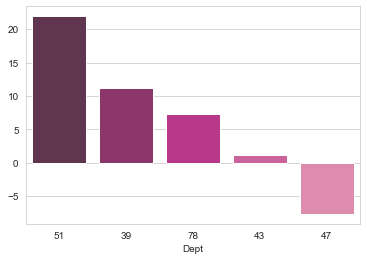

In [58]:
weekly_sales_dept = train_merged['Weekly_Sales'].groupby(train_merged['Dept']).mean()
smallest_5_Dept=weekly_sales_dept.nsmallest(5,)
sns.barplot(smallest_5_Dept.index,smallest_5_Dept.values,order=smallest_5_Dept.sort_values(ascending=False).index,palette="RdPu_d")
plt.show()

Comparison of Store and Dept in Average Weekly Sales

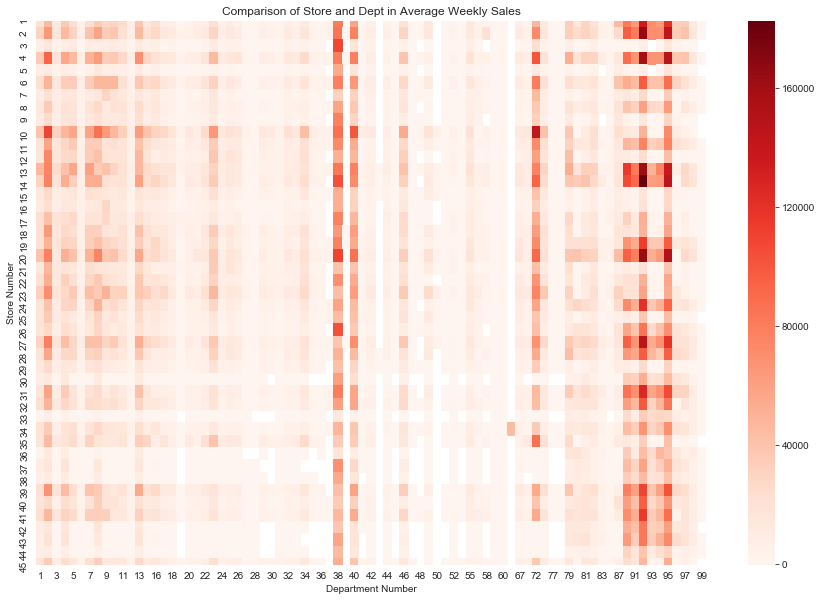

In [59]:
#dataframe for sales by department
dept_sales=train_merged.groupby(by=['Store','Dept'])['Weekly_Sales'].mean().to_frame().reset_index()
plt.subplots(figsize=(15,10))
sns.heatmap(dept_sales.pivot(index='Store',columns='Dept',values='Weekly_Sales'),cmap="Reds")
plt.xlabel('Department Number')
plt.ylabel('Store Number')
plt.title('Comparison of Store and Dept in Average Weekly Sales')
plt.show()

Compare Type and weekly sales

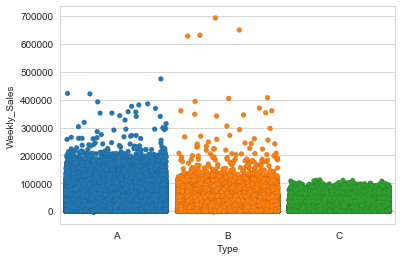

In [60]:
sns.stripplot('Type','Weekly_Sales',data=train_merged,linewidth=0.1,jitter=0.45)
plt.show()

Type Vs Size

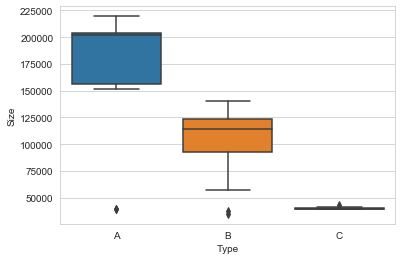

In [61]:
sns.boxplot('Type','Size',data=stores_raw)
plt.show()

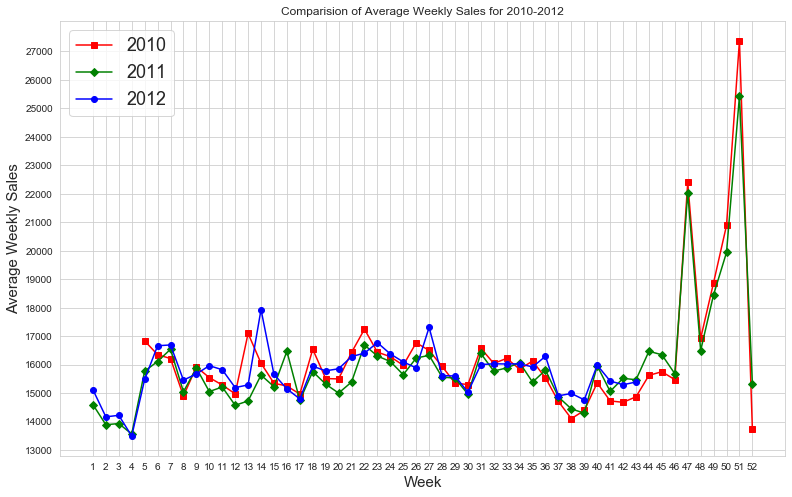

In [62]:
#Weekly sales comparision for three years
train_merged.Date = pd.to_datetime(train_merged.Date,format='%Y-%m-%d')

train_merged['Year']=pd.DatetimeIndex(train_merged['Date']).year
train_merged['Month']=pd.DatetimeIndex(train_merged['Date']).month
train_merged['Day']=pd.DatetimeIndex(train_merged['Date']).day
train_merged['Week']=train_merged['Date'].dt.week

Sales2010=train_merged[train_merged['Year']==2010]
Sales2010 = Sales2010['Weekly_Sales'].groupby(Sales2010['Week']).mean()

Sales2011=train_merged[train_merged['Year']==2011]
Sales2011 = Sales2011['Weekly_Sales'].groupby(Sales2011['Week']).mean()

Sales2012=train_merged[train_merged['Year']==2012]
Sales2012 = Sales2012['Weekly_Sales'].groupby(Sales2012['Week']).mean()
plt.subplots(figsize=(13,8))

plt.plot(Sales2010,color='red',marker='s')
plt.plot(Sales2011,color='green',marker='D')
plt.plot(Sales2012,color='blue',marker='o')

plt.xticks(np.arange(1,53,step=1))
plt.yticks(np.arange(13000,28000,step=1000))
plt.legend(['2010','2011','2012'],loc='best',fontsize=18)
plt.xlabel('Week',fontsize=15)
plt.ylabel('Average Weekly Sales', fontsize=15)

plt.title('Comparision of Average Weekly Sales for 2010-2012')


plt.show()


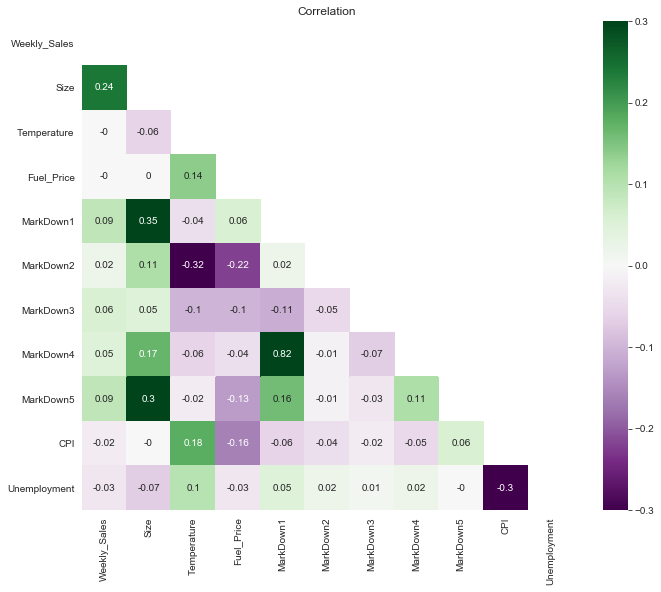

In [63]:
# create a heat map of correlation
matrix=train_merged[['Weekly_Sales','Size','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3',\
                          'MarkDown4','MarkDown5','CPI','Unemployment']]
f, ax = plt.subplots(figsize=(11, 9))
matrix1 = np.triu(matrix.corr())
sns.heatmap(matrix.corr().round(2), annot=True,cmap='PRGn',mask=matrix1,vmin=-.3, vmax=.3)

ax.set_ylim([11,0])
plt.title('Correlation')
plt.show()

0: no correlation at all
0-0.3: weak correlation
0.3-0.7: moderate correlaton
0.7-1: strong correlation

<font size="5">Data Manupliating</font>

In [64]:
#replacing all Na for markdown 1-5 with 0.
train_merged2=train_merged.fillna(0)
train_merged2.isna().sum()


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Year            0
Month           0
Day             0
Week            0
dtype: int64

In [65]:
#As we have 3 types of stores (A,B and C) which are categorical. Therefore splitting wach type as a feature into one-hot encoding
ABC = pd.get_dummies(train_merged2.Type)
train_merged3 = pd.concat([train_merged2, ABC], axis=1)
train_merged3 = train_merged3.drop(columns='Type')
train_merged3.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown5,CPI,Unemployment,Year,Month,Day,Week,A,B,C
0,1,1,2010-02-05,24924.50,False,151315,42.31,2.572,0.0,0.0,...,0.0,211.096358,8.106,2010,2,5,5,1,0,0
1,1,2,2010-02-05,50605.27,False,151315,42.31,2.572,0.0,0.0,...,0.0,211.096358,8.106,2010,2,5,5,1,0,0
2,1,3,2010-02-05,13740.12,False,151315,42.31,2.572,0.0,0.0,...,0.0,211.096358,8.106,2010,2,5,5,1,0,0
3,1,4,2010-02-05,39954.04,False,151315,42.31,2.572,0.0,0.0,...,0.0,211.096358,8.106,2010,2,5,5,1,0,0
4,1,5,2010-02-05,32229.38,False,151315,42.31,2.572,0.0,0.0,...,0.0,211.096358,8.106,2010,2,5,5,1,0,0


In [66]:
#replace True and False to 1 and 0
train_merged4= train_merged3.applymap(lambda x: 1 if x == True else x)
train_merged4= train_merged3.applymap(lambda x: 0 if x == False else x)
train_merged4.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown5,CPI,Unemployment,Year,Month,Day,Week,A,B,C
0,1,1,2010-02-05,24924.50,0,151315,42.31,2.572,0.0,0.0,...,0.0,211.096358,8.106,2010,2,5,5,1,0,0
1,1,2,2010-02-05,50605.27,0,151315,42.31,2.572,0.0,0.0,...,0.0,211.096358,8.106,2010,2,5,5,1,0,0
2,1,3,2010-02-05,13740.12,0,151315,42.31,2.572,0.0,0.0,...,0.0,211.096358,8.106,2010,2,5,5,1,0,0
3,1,4,2010-02-05,39954.04,0,151315,42.31,2.572,0.0,0.0,...,0.0,211.096358,8.106,2010,2,5,5,1,0,0
4,1,5,2010-02-05,32229.38,0,151315,42.31,2.572,0.0,0.0,...,0.0,211.096358,8.106,2010,2,5,5,1,0,0


In [67]:
train_merged5=train_merged4
train_merged5.Date = pd.to_datetime(train_merged5.Date,format='%Y-%m-%d')
train_merged5.index = train_merged5.Date
train_merged5 = train_merged5.drop('Date', axis=1)
train_merged5.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Year,Month,Day,Week,A,B,C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,0,151315,42.31,2.572,0.0,0.0,0.0,...,0.0,211.096358,8.106,2010,2,5,5,1,0,0
2010-02-05,1,2,50605.27,0,151315,42.31,2.572,0.0,0.0,0.0,...,0.0,211.096358,8.106,2010,2,5,5,1,0,0
2010-02-05,1,3,13740.12,0,151315,42.31,2.572,0.0,0.0,0.0,...,0.0,211.096358,8.106,2010,2,5,5,1,0,0
2010-02-05,1,4,39954.04,0,151315,42.31,2.572,0.0,0.0,0.0,...,0.0,211.096358,8.106,2010,2,5,5,1,0,0
2010-02-05,1,5,32229.38,0,151315,42.31,2.572,0.0,0.0,0.0,...,0.0,211.096358,8.106,2010,2,5,5,1,0,0


In [68]:
#Drop coloumns from MarkDown1-5, since there are many missing value and only have impact to sales when there are Holiday events.
train_final=train_merged5.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)
train_final.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Week,A,B,C
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,0,151315,42.31,2.572,211.096358,8.106,2010,2,5,5,1,0,0
2010-02-05,1,2,50605.27,0,151315,42.31,2.572,211.096358,8.106,2010,2,5,5,1,0,0
2010-02-05,1,3,13740.12,0,151315,42.31,2.572,211.096358,8.106,2010,2,5,5,1,0,0
2010-02-05,1,4,39954.04,0,151315,42.31,2.572,211.096358,8.106,2010,2,5,5,1,0,0
2010-02-05,1,5,32229.38,0,151315,42.31,2.572,211.096358,8.106,2010,2,5,5,1,0,0


<font size="5">Data Modeling</font>

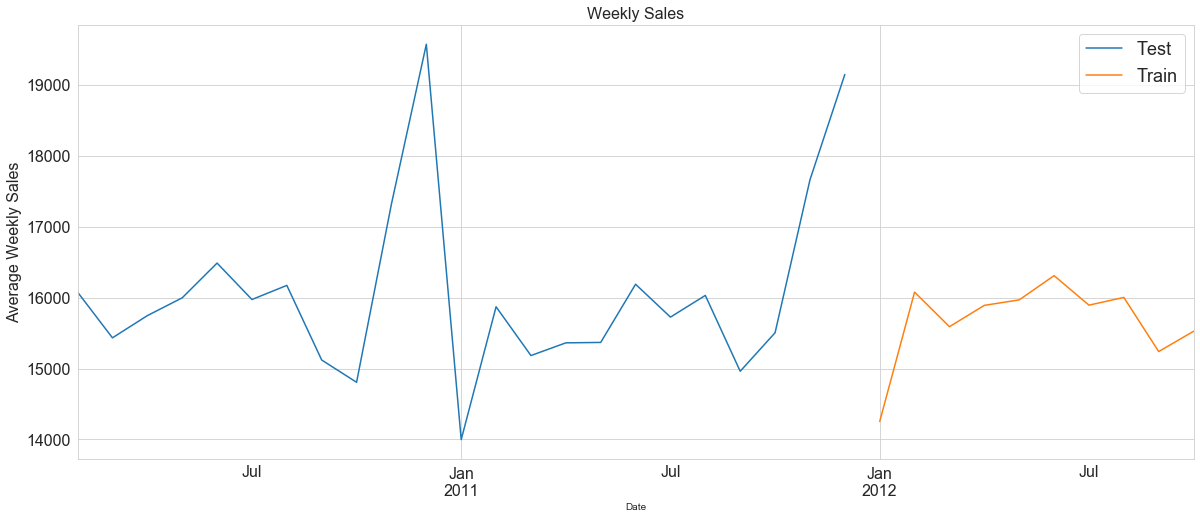

In [69]:
train_final = train_final.resample('MS').mean() # Resmapling the time series data with month starting first.

train_data = train_final[:int(0.7*(len(train_final)))]
test_data = train_final[int(0.7*(len(train_final))):]

train_data = train_data['Weekly_Sales']
test_data = test_data['Weekly_Sales']

train_data.plot(figsize=(10,12), title= 'Weekly_Sales', fontsize=16)
test_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=16)

plt.legend(['Test','Train'],loc='best',fontsize=18)
plt.title('Weekly Sales',fontsize=16)
plt.ylabel('Average Weekly Sales',fontsize=16)
plt.show()

In [70]:
#Augmented Dickey-Fuller Test
X = train_final['Weekly_Sales']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.239447
p-value: 0.000565
Critical Values:
	1%: -3.770
	5%: -3.005
	10%: -2.643


- Since less than 0.5, the data is stationary
- Good to use ARIMA

In [71]:
#ARIMA
#Holt's Winter Method
#SVR


In [72]:
#Decision Tree
#Random Forest